# **Task 2: Training from scratch: images**

In [1]:
# necessary imports
import os
import numpy
import pandas
import random
import trimesh
import logging
import tensorflow
from PIL import Image
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import models, layers, regularizers, optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization

# import Stratified K-Fold Cross Validation notebook
%run KFold-Cross-Validation.ipynb

# dataset root path
DATASET_ROOT = '/run/media/rr/M2/DevOps/jupyter-lab/CIDL/dataset/'

# final preprocessed dataset directory path
DATASET_PATH = os.path.join(DATASET_ROOT, 'Preprocessed')

# number of classes for the classification task
NUM_CLASSES = 5

In [2]:
# only log critical messages
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

## Input Target Size

In [3]:
# loop through images, load and store size
images_sizes = []
for image_filename in images_X['filename']:
    if image_filename != 'filename':
        image = Image.open(image_filename)
        images_sizes.append(image.size)

# convert to np array
images_sizes = numpy.array(images_sizes)

# print statistics
print("Loaded images: " + str(len(images_sizes)))
print("Average size: " + str(numpy.average(images_sizes, axis=0)))

Loaded images: 55086
Average size: [512. 512.]


In [4]:
# target size
TARGET_SIZE = (128, 128)

## Experiment 0 - Simple Model

Found 1500 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 11250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.
Model: "Experiment-0-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                              

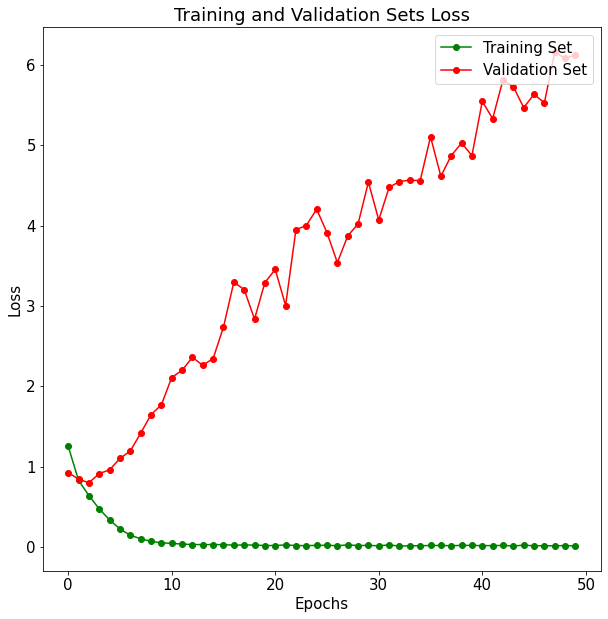

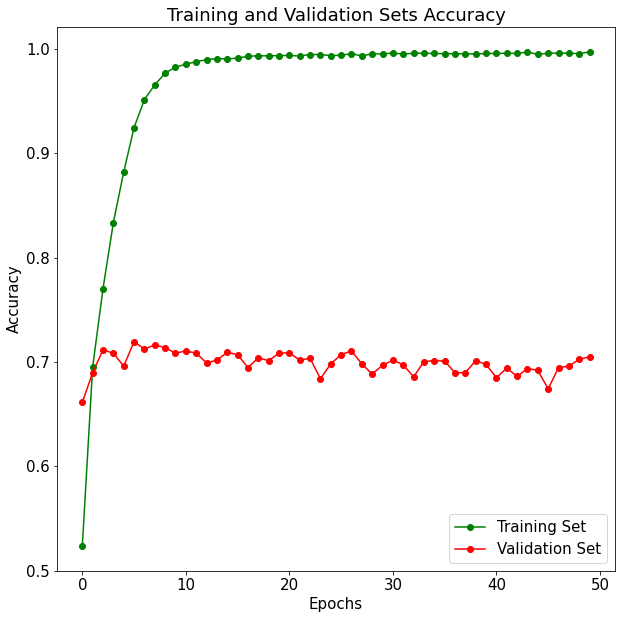

47/47 [==============================] - 4s 95ms/step - loss: 0.7995 - accuracy: 0.7107
Best model Test Loss: 0.7995204329490662
Best model Test Accuracy: 0.7106666564941406
Confusion Matrix
Normalized confusion matrix


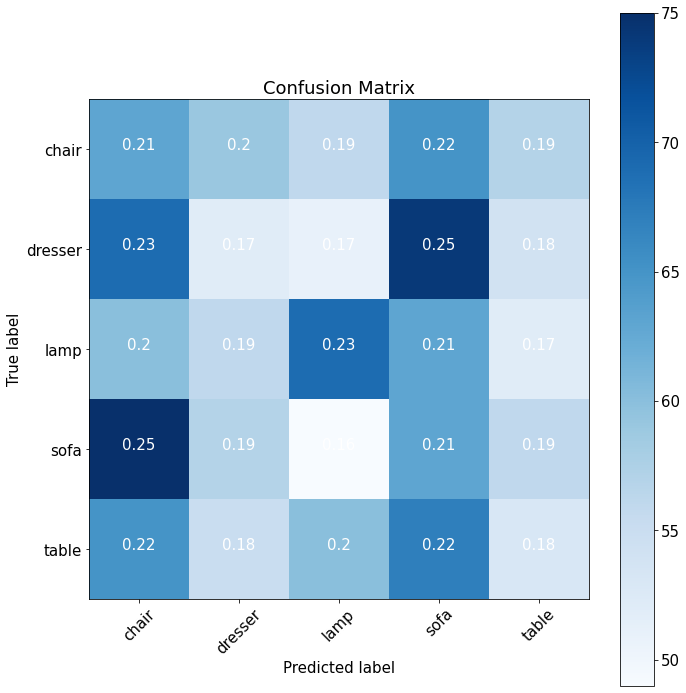

Classification Report
              precision    recall  f1-score   support

       chair       0.19      0.21      0.20       300
     dresser       0.19      0.17      0.18       300
        lamp       0.24      0.23      0.24       300
        sofa       0.19      0.21      0.20       300
       table       0.19      0.18      0.19       300

    accuracy                           0.20      1500
   macro avg       0.20      0.20      0.20      1500
weighted avg       0.20      0.20      0.20      1500


-------- TERMINATED FOLD: 1 --------


In [10]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation(model_name="Experiment-0", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=50,
                        batch_size=32, one_fold=True, resample_data=3000, augment=False)

## Experiment 1 - Dropout

Found 1500 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 11250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.
Model: "Experiment-1-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                              

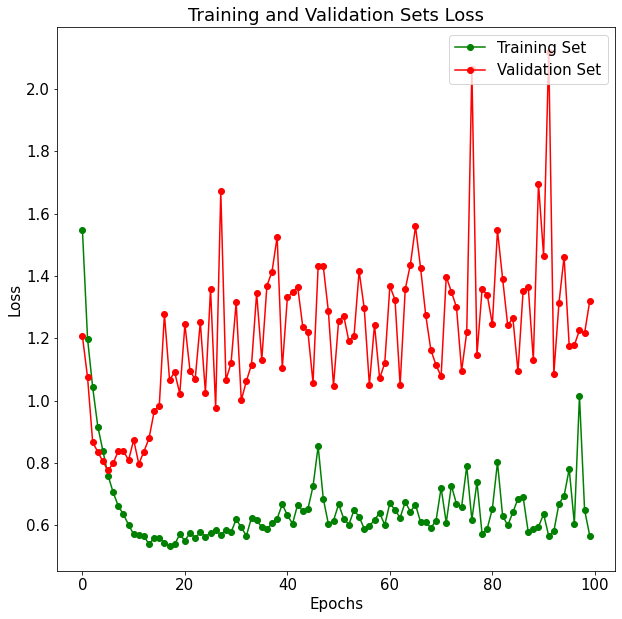

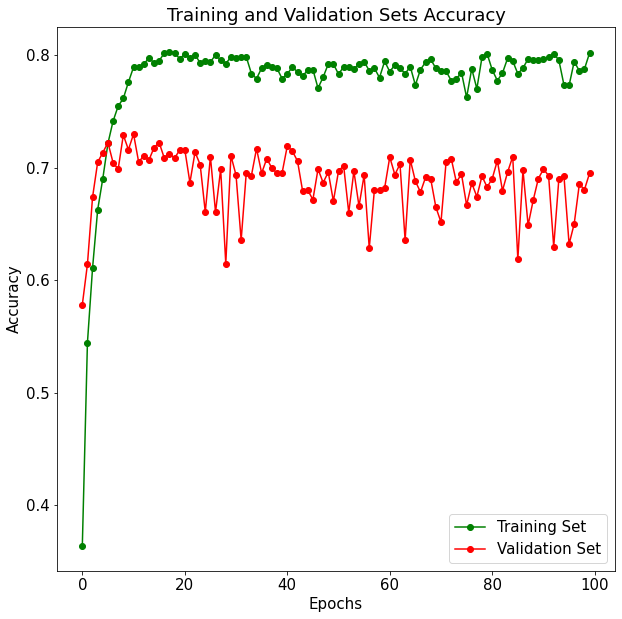

47/47 [==============================] - 5s 96ms/step - loss: 0.8185 - accuracy: 0.7080
Best model Test Loss: 0.8184950351715088
Best model Test Accuracy: 0.7080000042915344
Confusion Matrix
Normalized confusion matrix


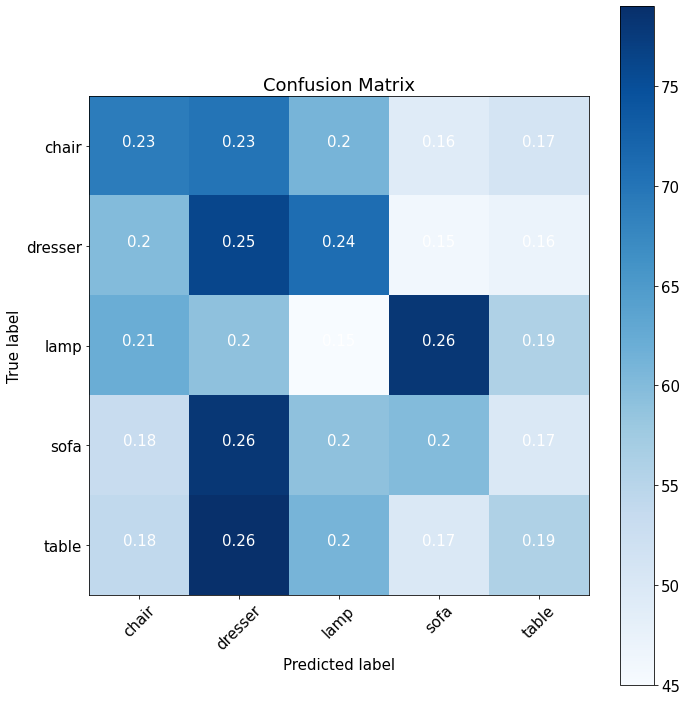

Classification Report
              precision    recall  f1-score   support

       chair       0.23      0.23      0.23       300
     dresser       0.21      0.25      0.23       300
        lamp       0.15      0.15      0.15       300
        sofa       0.21      0.20      0.21       300
       table       0.22      0.19      0.20       300

    accuracy                           0.20      1500
   macro avg       0.20      0.20      0.20      1500
weighted avg       0.20      0.20      0.20      1500


-------- TERMINATED FOLD: 1 --------


In [6]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation(model_name="Experiment-1", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=100,
                        batch_size=32, one_fold=True, resample_data=3000, augment=False)

## Experiment 2 - Larger Model

Found 1500 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 11250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.


2022-02-08 21:25:19.318770: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 21:25:19.337598: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 21:25:19.337760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 21:25:19.338212: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "Experiment-2-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)   

2022-02-08 21:25:20.995745: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


  1/352 [..............................] - ETA: 10:46 - loss: 1.6131 - accuracy: 0.2188

2022-02-08 21:25:21.701692: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


352/352 [==============================] - ETA: 0s - loss: 1.1996 - accuracy: 0.5466
Epoch 00001: val_loss improved from inf to 0.91842, saving model to saved_models/images/Experiment-2/Experiment-2-fold-1.h5
352/352 [==============================] - 43s 116ms/step - loss: 1.1996 - accuracy: 0.5466 - val_loss: 0.9184 - val_accuracy: 0.6458
Epoch 2/100
352/352 [==============================] - ETA: 0s - loss: 0.9057 - accuracy: 0.6659
Epoch 00002: val_loss improved from 0.91842 to 0.82756, saving model to saved_models/images/Experiment-2/Experiment-2-fold-1.h5
352/352 [==============================] - 40s 113ms/step - loss: 0.9057 - accuracy: 0.6659 - val_loss: 0.8276 - val_accuracy: 0.6907
Epoch 3/100
352/352 [==============================] - ETA: 0s - loss: 0.7903 - accuracy: 0.7131
Epoch 00003: val_loss improved from 0.82756 to 0.79282, saving model to saved_models/images/Experiment-2/Experiment-2-fold-1.h5
352/352 [==============================] - 39s 112ms/step - loss: 0.7903 

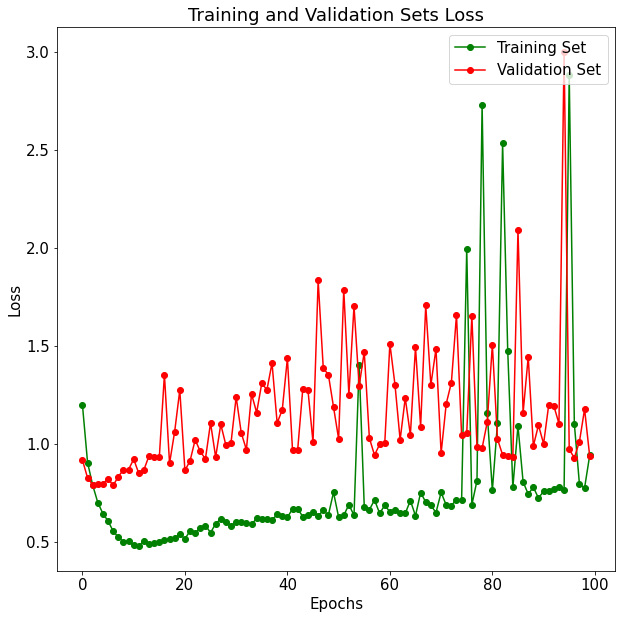

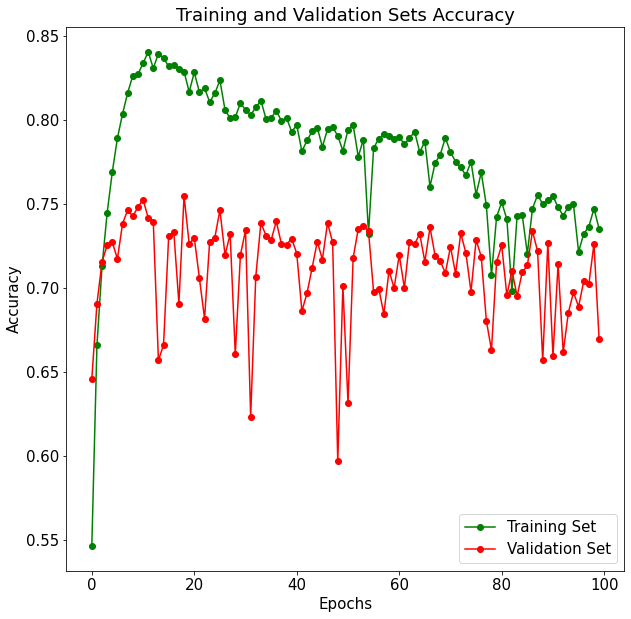

47/47 [==============================] - 5s 100ms/step - loss: 0.7140 - accuracy: 0.7593
Best model Test Loss: 0.7139813899993896
Best model Test Accuracy: 0.7593333125114441
Confusion Matrix
Normalized confusion matrix


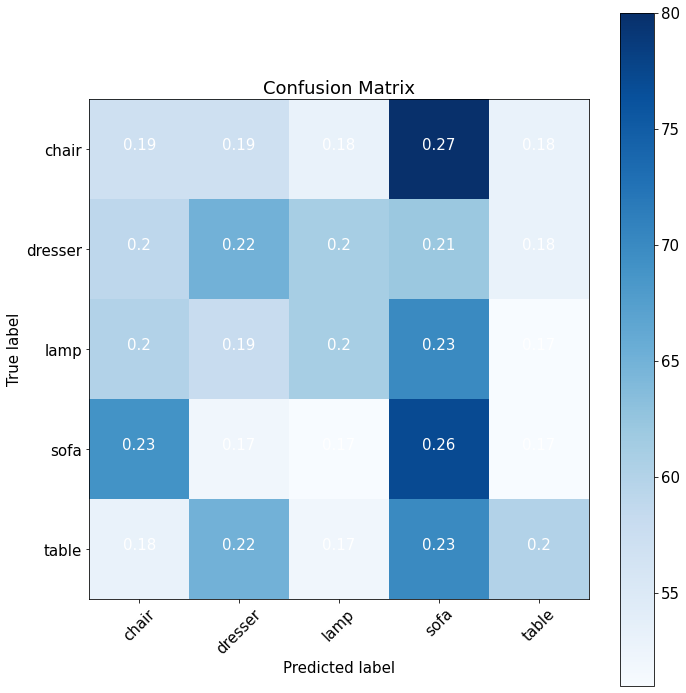

Classification Report
              precision    recall  f1-score   support

       chair       0.19      0.19      0.19       300
     dresser       0.22      0.22      0.22       300
        lamp       0.22      0.20      0.21       300
        sofa       0.21      0.26      0.23       300
       table       0.22      0.20      0.21       300

    accuracy                           0.21      1500
   macro avg       0.21      0.21      0.21      1500
weighted avg       0.21      0.21      0.21      1500


-------- TERMINATED FOLD: 1 --------


In [5]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation(model_name="Experiment-2", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=100,
                        batch_size=32, one_fold=True, resample_data=3000, augment=False)

## Experiment 3 - Data Augmentation

Found 1500 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 11250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.
Model: "Experiment-3-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                              

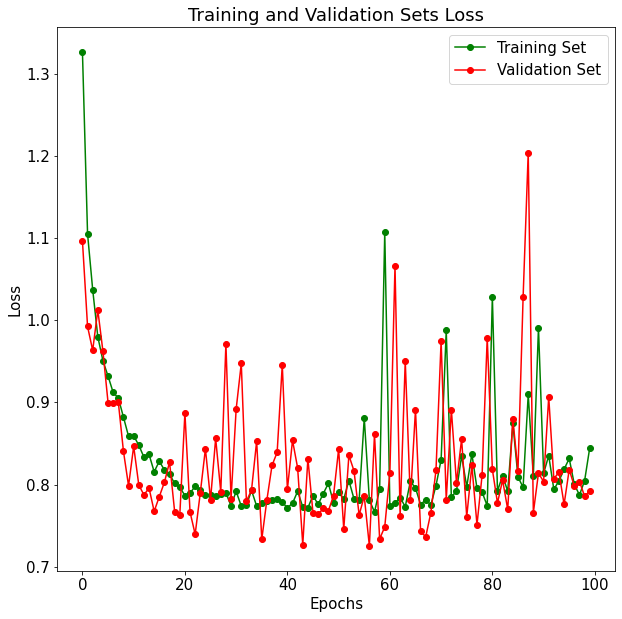

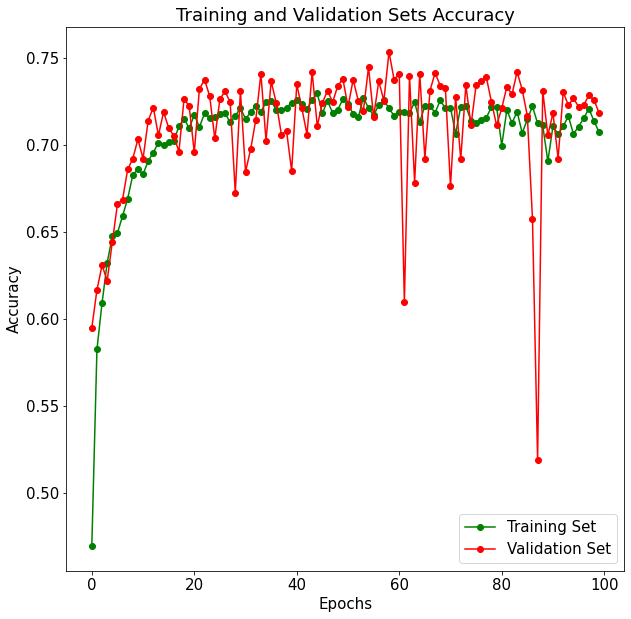

24/24 [==============================] - 7s 275ms/step - loss: 0.7259 - accuracy: 0.7500
Best model Test Loss: 0.7259452939033508
Best model Test Accuracy: 0.75
Confusion Matrix
Normalized confusion matrix


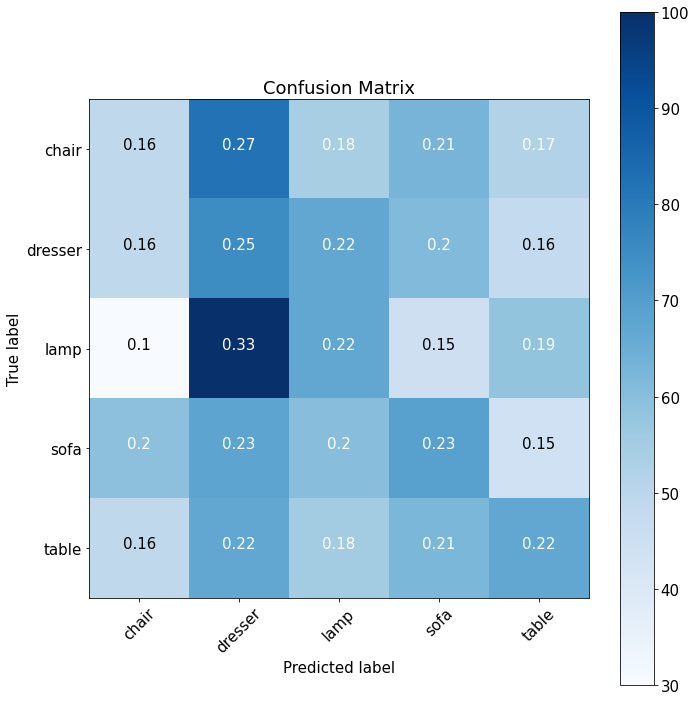

Classification Report
              precision    recall  f1-score   support

       chair       0.21      0.16      0.18       300
     dresser       0.19      0.25      0.22       300
        lamp       0.22      0.22      0.22       300
        sofa       0.23      0.23      0.23       300
       table       0.25      0.22      0.24       300

    accuracy                           0.22      1500
   macro avg       0.22      0.22      0.22      1500
weighted avg       0.22      0.22      0.22      1500


-------- TERMINATED FOLD: 1 --------


In [6]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation(model_name="Experiment-3", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=100,
                        batch_size=64, one_fold=True, resample_data=3000, augment=True)

## Experiment 4 - Deeper CNN, Longer Training

In [ ]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation(model_name="Experiment-4", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=200,
                        batch_size=64, one_fold=True, resample_data=3000, augment=True)

Found 1500 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 11250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.


2022-02-09 21:08:03.013047: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-09 21:08:03.030138: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-09 21:08:03.030243: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-09 21:08:03.030714: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "Experiment-4-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)   

2022-02-09 21:08:04.953033: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301
2022-02-09 21:08:05.698347: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


176/176 [==============================] - ETA: 0s - loss: 1.3693 - accuracy: 0.4395
Epoch 00001: val_loss improved from inf to 1.14695, saving model to saved_models/images/Experiment-4/Experiment-4-fold-1.h5
176/176 [==============================] - 62s 340ms/step - loss: 1.3693 - accuracy: 0.4395 - val_loss: 1.1469 - val_accuracy: 0.5564
Epoch 2/200
176/176 [==============================] - ETA: 0s - loss: 1.1407 - accuracy: 0.5656
Epoch 00002: val_loss improved from 1.14695 to 1.00872, saving model to saved_models/images/Experiment-4/Experiment-4-fold-1.h5
176/176 [==============================] - 59s 337ms/step - loss: 1.1407 - accuracy: 0.5656 - val_loss: 1.0087 - val_accuracy: 0.6124
Epoch 3/200
176/176 [==============================] - ETA: 0s - loss: 1.0549 - accuracy: 0.6045
Epoch 00003: val_loss improved from 1.00872 to 0.86853, saving model to saved_models/images/Experiment-4/Experiment-4-fold-1.h5
176/176 [==============================] - 59s 333ms/step - loss: 1.0549 

## Experiment 5 - Larger Dense Layer, Larger Batch Size

In [ ]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation(model_name="Experiment-5", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=300,
                        batch_size=128, one_fold=True, resample_data=3000, augment=True)

## Experiment 6 - Learning Rate Decay

In [ ]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation(model_name="Experiment-6", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=0.0001, target_size=TARGET_SIZE, epochs=400,
                        batch_size=128, one_fold=True, resample_data=3000, augment=True)

## Experiment 7 - Larger Kernel

In [ ]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(4, 4), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation(model_name="Experiment-7", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=0.0001, target_size=TARGET_SIZE, epochs=400,
                        batch_size=128, one_fold=True, resample_data=3000, augment=True)

## Experiment 8 - Regularization

In [ ]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(5, 5), activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.001), input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(4, 4), activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.001)),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation(model_name="Experiment-8", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=0.0001, target_size=TARGET_SIZE, epochs=400,
                        batch_size=128, one_fold=True, resample_data=3000, augment=True)

## Experiment 9 - Batch Normalization

In [ ]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(5, 5), activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.001), input_shape=(128, 128, 3)),
    BatchNormalization(momentum=0.001),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(4, 4), activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.001)),
    BatchNormalization(momentum=0.001),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.001)),
    BatchNormalization(momentum=0.001),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.001)),
    BatchNormalization(momentum=0.001),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.001)),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation(model_name="Experiment-9", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=0.0001, target_size=TARGET_SIZE, epochs=400,
                        batch_size=128, one_fold=True, resample_data=3000, augment=True)